<a href="https://colab.research.google.com/github/yhp2205/python/blob/main/%EB%82%A0%EC%94%A8%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 서울이 가장 더웠던 날은 언제? (날짜)
    - 얼마나 더웠나? (온도)
2. 서울의 평균 기온이 상승하고 있는가? (월평균, 년평균 기온 비교)
3. 기후 현상으로 기온이 증가하고 있는가? (같은 년의 평균 기온을 비교해서 그래프 그려보기)
4. 6.25 전쟁으로 데이터가 얼마나 손실이 발생했는가 (결측치에 대한 부분)  
info, describe 함수 사용해보기

In [48]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [49]:
import matplotlib.pyplot as plt

plt.rc('font', family = 'NanumBarunGothic')

In [50]:
# 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
csvPath = '/content/drive/MyDrive/2023 구글클라우드인공지능과정/코드/Pandas/ds/preprocessed_data_v1.csv'

In [52]:
import pandas as pd

In [53]:
df = pd.read_csv(csvPath, encoding='cp949')
df.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3
3,1907-10-04,108,16.5,11.2,22.0
4,1907-10-05,108,17.6,10.9,25.4


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40982 entries, 0 to 40981
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       40982 non-null  object 
 1   지점       40982 non-null  int64  
 2   평균기온(℃)  40226 non-null  float64
 3   최저기온(℃)  40225 non-null  float64
 4   최고기온(℃)  40224 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.6+ MB


In [55]:
df["날짜"] = pd.to_datetime(df["날짜"])

In [56]:
df.columns

Index(['날짜', '지점', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)'], dtype='object')

In [57]:
df.columns = ['날짜', '지점', '평균기온', '최저기온', '최고기온']

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40982 entries, 0 to 40981
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      40982 non-null  datetime64[ns]
 1   지점      40982 non-null  int64         
 2   평균기온    40226 non-null  float64       
 3   최저기온    40225 non-null  float64       
 4   최고기온    40224 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 1.6 MB


In [59]:
# 특정 기간 데이터 추출

# df[(df['날짜']>='1907-10-01') & (df['날짜']<'1907-11-01')]

df[df['날짜'].between('1907-10-01', '1907-10-31')]

,날짜,지점,평균기온,최저기온,최고기온
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3
3,1907-10-04,108,16.5,11.2,22.0
4,1907-10-05,108,17.6,10.9,25.4
5,1907-10-06,108,13.0,11.2,21.3
6,1907-10-07,108,11.3,6.3,16.1
7,1907-10-08,108,8.9,3.9,14.9
8,1907-10-09,108,11.6,3.8,21.1
9,1907-10-10,108,14.2,6.4,24.1


In [60]:
# 평균 기온 구하기
df[df['날짜'].between('1907-10-01', '1907-10-31')].max()

날짜      1907-10-31 00:00:00
지점                      108
평균기온                   18.3
최저기온                   13.1
최고기온                   25.4
dtype: object

In [61]:
df.max()

날짜      2021-02-16 00:00:00
지점                      108
평균기온                   33.7
최저기온                   30.3
최고기온                   39.6
dtype: object

서울의 가장 더운 날은 언제였는가?

In [62]:
df[df["최고기온"] == 39.6]

,날짜,지점,평균기온,최저기온,최고기온
40051,2018-08-01,108,33.6,27.8,39.6


In [63]:
df[df["평균기온"] == 33.7]

,날짜,지점,평균기온,최저기온,최고기온
40052,2018-08-02,108,33.7,30.3,37.9


최고기온이 가장 높았던 날은 180801, 평균기온이 가장 높았던 날은 180802로 기온은 위와 같다.

In [64]:
# '날짜'컬럼을 년도,월 컬럼으로 분리하기
df['년도'] = df['날짜'].dt.strftime('%Y')
df['월'] = df['날짜'].dt.strftime('%m')

In [65]:
df['년도'].value_counts().tail(20)

1962    365
1961    365
1959    365
1958    365
1957    365
1954    365
1941    365
1953    365
1949    365
1947    365
1946    365
1945    365
1943    365
1942    365
2018    365
1952    335
1950    299
1907     92
2021     47
1951     31
Name: 년도, dtype: int64

전쟁으로 인해 결측치가 생긴 년도는 1950, 1951, 1952 총 3년이며 각 299, 51, 335 개이다

In [66]:
# 1907년 10월 데이터만 선택하기
#(df[(df['년도'] == '1907') & (df['월'] == '10')]) #['최고기온']
#len(df[(df['년도'] == '1907') & (df['월'] == '10')])
(df[(df['년도'] == '1907') & (df['월'] == '10')])['최고기온'].sum() / len(df[(df['년도'] == '1907') & (df['월'] == '10')])

20.216129032258067

In [149]:
df1 = df.groupby(df['년도']).mean().reset_index()

<ipython-input-149-05d8eceeb8d9>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1 = df.groupby(df['년도']).mean().reset_index()


In [150]:
df1

,년도,지점,평균기온,최저기온,최고기온
0,1907,108.0,5.103261,0.067391,10.416304
1,1908,108.0,10.427322,5.799727,15.771858
2,1909,108.0,10.608767,5.832603,16.011507
3,1910,108.0,10.412055,5.752603,16.008767
4,1911,108.0,10.654795,6.035616,16.001644
...,...,...,...,...,...
110,2017,108.0,13.073151,8.845205,18.123901
111,2018,108.0,13.002466,8.871233,17.956986
112,2019,108.0,13.598904,9.321096,18.602192
113,2020,108.0,13.271858,9.389617,17.867213


In [151]:
df1 = df1.astype({'년도':'int'})

In [152]:
df1 = df1.drop(['최저기온', '최고기온'], axis='columns')

In [158]:
df1 = df1.set_index(['년도'])

In [159]:
df1

,지점,평균기온
년도,,
1907,108.0,5.103261
1908,108.0,10.427322
1909,108.0,10.608767
1910,108.0,10.412055
1911,108.0,10.654795
...,...,...
2017,108.0,13.073151
2018,108.0,13.002466
2019,108.0,13.598904


In [140]:
# 이상치 제거
#df1_new = pd.Series(df1)
#level_1 = df1_new.quantile(0.25)
#level_3 = df1_new.quantile(0.75)
#lqr = level_1 - level_3
#rev_range = 3
#dff = df1_new[(df1_new <= level_3 + (rev_range*lqr)) & (df1_new >= level_1 - (rev_range * lqr))]
#dff = dff.reset_index(drop=True)

In [141]:
#import matplotlib.pyplot as plt

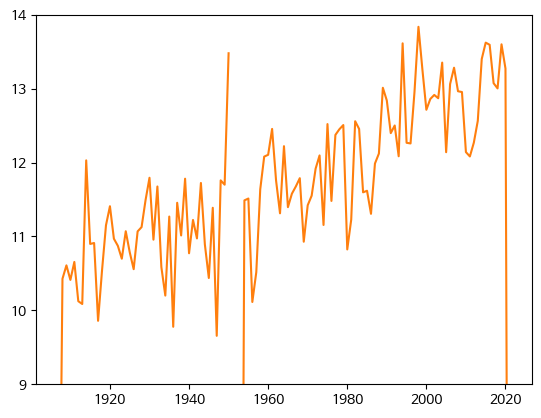

In [160]:
plt.plot(df1)
plt.ylim([9, 14])
plt.show()

In [82]:
df

,날짜,지점,평균기온,최저기온,최고기온,년도,월
0,1907-10-01,108,13.5,7.9,20.7,1907,10
1,1907-10-02,108,16.2,7.9,22.0,1907,10
2,1907-10-03,108,16.2,13.1,21.3,1907,10
3,1907-10-04,108,16.5,11.2,22.0,1907,10
4,1907-10-05,108,17.6,10.9,25.4,1907,10
...,...,...,...,...,...,...,...
40977,2021-02-12,108,6.5,0.6,14.0,2021,02
40978,2021-02-13,108,7.6,1.0,15.9,2021,02
40979,2021-02-14,108,9.5,6.4,13.8,2021,02
40980,2021-02-15,108,1.2,-5.2,8.2,2021,02


In [161]:
df2 = df.groupby(["년도", "월"]).mean().reset_index()[3:-2]
df2 = df2.astype({'년도':'int'})
df2

<ipython-input-161-1a35e620761d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2 = df.groupby(["년도", "월"]).mean().reset_index()[3:-2]


,년도,월,지점,평균기온,최저기온,최고기온
3,1908,01,108.0,-3.464516,-7.506452,0.138710
4,1908,02,108.0,-4.058621,-8.768966,0.810345
5,1908,03,108.0,2.919355,-1.722581,8.064516
6,1908,04,108.0,10.060000,4.580000,16.486667
7,1908,05,108.0,14.851613,10.012903,21.141935
...,...,...,...,...,...,...
1340,2020,08,108.0,26.519355,24.416129,29.325806
1341,2020,09,108.0,21.393333,17.956667,25.573333
1342,2020,10,108.0,14.290323,9.596774,19.490323
1343,2020,11,108.0,8.026667,4.030000,12.550000


In [94]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: xlabel='월', ylabel='평균기온'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


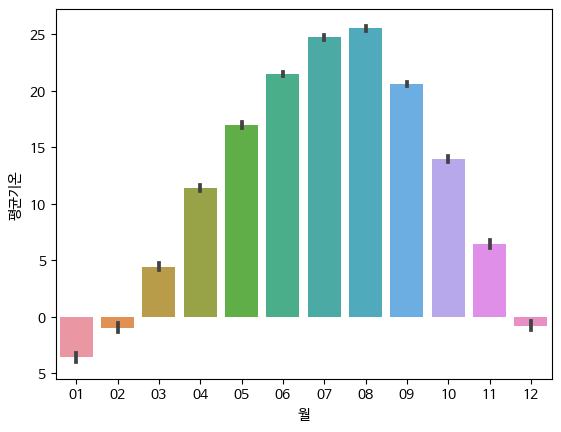

In [162]:
sns.barplot(data = df2, x = '월', y = '평균기온')

<Axes: xlabel='월', ylabel='평균기온'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


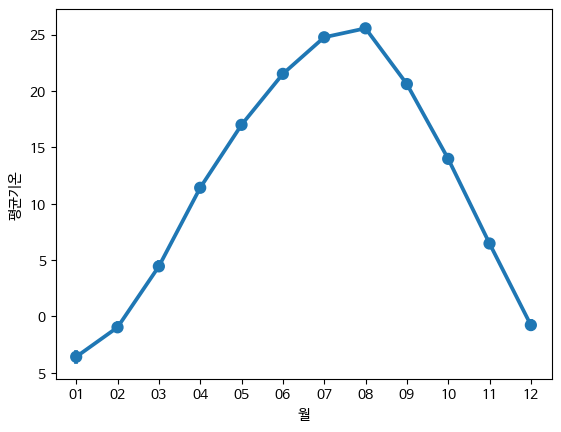

In [163]:
sns.pointplot(data = df2, x = '월', y = '평균기온')

<Axes: xlabel='월', ylabel='평균기온'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


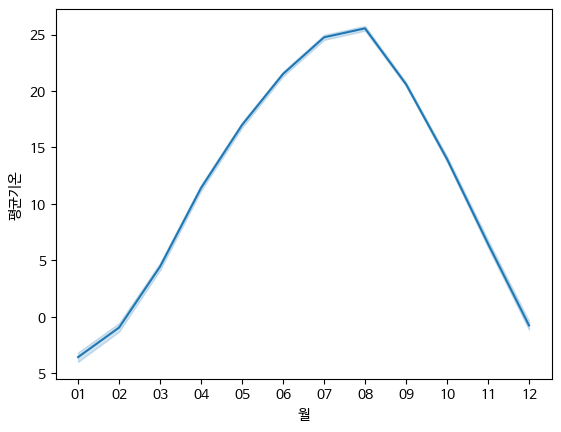

In [164]:
sns.lineplot(data = df2, x = '월', y = '평균기온')

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


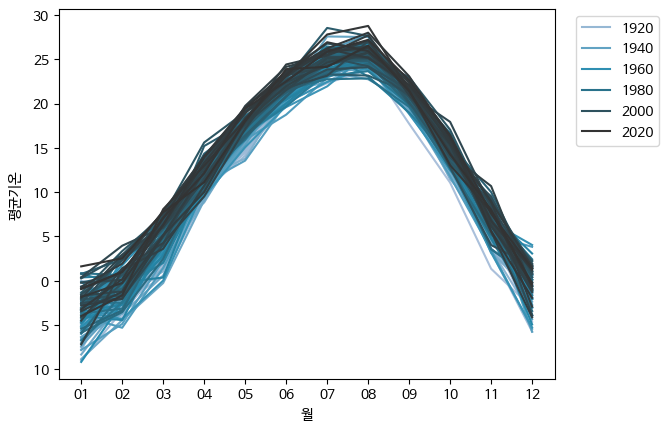

In [165]:
# 년도별 구분을 위해 hue 인자에 month 할당
sns.lineplot(data = df2, x = '월', y = '평균기온', hue = '년도', palette = 'PuBuGn_d')

# 그래프 밖에 레전프 추가
plt.legend(bbox_to_anchor = (1.03, 1), loc = 2)